In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # lib utilizada para trabalhar com vetores
import pandas as pd # lib para trabalhar com dataframes (planilhas excel)
import seaborn as sns #lib utilizada para criar graficos mais bonitos
import matplotlib.pyplot as plt #lib para criar graficos comuns ao estilo matlab

#abrir o arquivo csv que contém os dados a serem utilizados durante a prática
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

customers.head()





,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#CustomerID = Identificação unica de um cliente
#Gender = Genero do cliente
#Age = Idade do consumidor
#Annullll income = renda anual do cliente
#Spending score = Pontuacao atribuida pelo shopping com base no comportamento do cliente e na natureza do gasto**

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
#Verificando a existencia de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
#adicionando valores nulos
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

In [19]:
#verificando valores nulos
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [20]:
#analisando o dataset

customers_null.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
5,NaN,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,NaN
7,8.0,Female,23.0,18.0,94.0
8,9.0,Male,64.0,19.0,3.0
9,10.0,Female,30.0,19.0,72.0


In [21]:
#verificando a existencia de campos nulos
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [22]:
#deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
7,8.0,Female,23.0,18.0,94.0
...,...,...,...,...,...
191,192.0,Female,32.0,103.0,69.0
193,194.0,Female,38.0,113.0,91.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0


In [23]:
#preenchendo os valores nan com o valor 0

customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,0.0,0.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,0,32.0,0.0,18.0


In [24]:
#encontra as estatisticas do dataset
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,101.366667,38.983333,59.561111,50.966667
std,57.722114,14.264647,26.012709,26.311605
min,2.000000,18.000000,15.000000,1.000000
25%,51.750000,28.000000,40.000000,34.750000
50%,101.500000,36.000000,60.500000,50.000000
75%,152.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
#preenchendo os valores medios da coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,101.366667,Male,19.000000,15.000000,39.0
1,2.000000,Male,21.000000,15.000000,81.0
2,3.000000,Female,20.000000,16.000000,6.0
3,4.000000,Female,23.000000,16.000000,77.0
4,5.000000,Female,31.000000,17.000000,40.0
...,...,...,...,...,...
195,196.000000,Female,38.983333,59.561111,79.0
196,197.000000,Female,45.000000,126.000000,28.0
197,198.000000,Male,32.000000,126.000000,74.0
198,199.000000,NaN,32.000000,59.561111,18.0


In [26]:
# Analisando o banco de dados
customers.describe() #função que retorna uma analise superficial dos dados

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,101.366667,38.983333,59.561111,50.966667
std,57.722114,14.264647,26.012709,26.311605
min,2.000000,18.000000,15.000000,1.000000
25%,51.750000,28.000000,40.000000,34.750000
50%,101.500000,36.000000,60.500000,50.000000
75%,152.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* **count = numero de elementos (linhas) existente no banco de dados**
* **mean = media dos valores na coluna**
* **std = desvio padrão dos dados presentes na coluna**
* **min = menor valor existente na coluna**
* **25% = primeiro quartil dos dados (25%)**
* **50% = segundo quartil dos dados (50%)**
* **75% = terceiro quartil dos dados (75%)**
* **max = valor máximo existente na coluna**

* Verificando se existem outliers (anomalias) nos dados. para isso, será utilizado boxplot

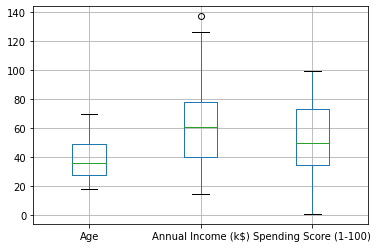

In [34]:
boxplot = customers_null.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)']) #constroi o boxplot para as colunas desejadas

* Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o Z-Score.

In [35]:
#Z-score

from scipy import stats

z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result=np.where(z > threshold)

df_salario_outliers = customers.iloc[result[0]]
#print(z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [37]:
df_salario_outliers #todos os usuários os usuarios com salario anual com possível outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


* Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes

Text(0.5, 1.0, 'Distribuição dos clientes quanto ao genero')

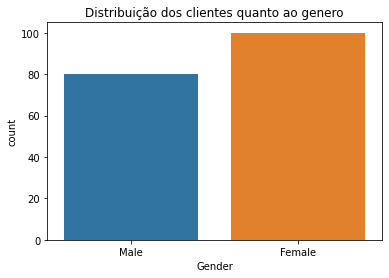

In [38]:
#analisando a distribuição dos clientes por genero
sns.countplot(x='Gender', data=customers); #cria o grafico que conta a quantidade de consumidores existente em cada um dos generos
plt.title('Distribuição dos clientes quanto ao genero') # adiciona o titulo no gráfico

* Distribuição dos consumidores pela idade

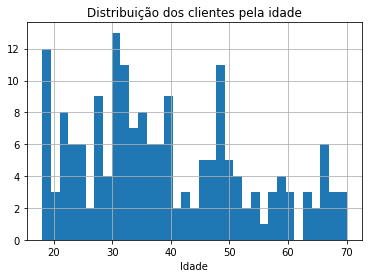

In [39]:
#analisando a distribuição dos clientes quanto a idade atraves do histograma
customers.hist('Age', bins=35); #seleciona a coluna idade para realizar o histograma
                                # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title("Distribuição dos clientes pela idade")
plt.xlabel("Idade");

* Aplicando a codificação aos dados

In [41]:
cat_df_customers = customers.select_dtypes(include=['object']) #Copiando as colunas que são do tipo categoricas

In [42]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


* Aplicando o Mapeamento

In [47]:
replace_map = {'Gender': {'Male': 1,'Femele': 2}} #define o dicionario a ser utilizado (map)
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() #encontra a lista das variaveis categoricas
replace_map_comp = {'Gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [55]:
cat_df_customers_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv') #realiza a copia do dataset

In [56]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True) #aplica o mapeamento para o dataset
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [57]:
#cat_df_customers_lc = customers
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [58]:
cat_df_customers_lc = customers

In [59]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [60]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [61]:
#impostando o label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Instanciando o objeto

In [63]:
# aplicando a codificação para as colunas categoricas
customers_label = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


* One Hot Encoding

In [64]:
# Get Dummies
customers_one_hot = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
#customers_one_hot head
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [65]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [67]:
# Importe OneHotEncoder
customers_one_hot = customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #instancia o objeto

In [69]:
# aplica o one hot encoding para a coluna

customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray() # It returns an numpy array
customers_ohe.shape

(200, 2)

In [70]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.